# Analise modelos ML

## Carregar dados tratados

In [1]:
# ! pip install seaborn
# ! pip install plotly
# ! pip install statsmodels
# ! pip install sklearn

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score

import joblib

In [3]:
def carregar_joblib():
    df = joblib.load("../out/result_analise_desc.joblib")
    return df

## Feature selection

In [4]:
def print_feature_selection_extra_trees(df):
    modelo = ExtraTreesClassifier(random_state=1)
    x = df.drop("decisao", axis=1)
    y = df["decisao"]
    modelo.fit(x, y)

    caracteristicas_importantes = pd.DataFrame(modelo.feature_importances_, x.columns).sort_values(by=0, ascending=False)
    print(caracteristicas_importantes)

In [5]:
def ajustar_scaler(tabela_original):
    scaler = StandardScaler()
    tabela_auxiliar = tabela_original.drop("decisao", axis=1)
    
    tabela_auxiliar = pd.DataFrame(scaler.fit_transform(tabela_auxiliar), tabela_auxiliar.index, tabela_auxiliar.columns)
    tabela_auxiliar["decisao"] = tabela_original["decisao"]
    
    return tabela_auxiliar


In [6]:
def split_dados(df):
    X = df.drop(["decisao"], axis=1)
    y = df["decisao"]

    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=1)

    print(f"{len(X_treino)=} {len(X_teste)=} {len(y_treino)=} {len(y_teste)=}")

    return X_treino, X_teste, y_treino, y_teste

## Dummy selection para avaliar uma selecao randomica de compra e venda

In [7]:
def run_dummy_classifier(
    X_treino,
    X_teste, 
    y_treino
):
    dummy = DummyClassifier(strategy="stratified", random_state=2)
    dummy.fit(X_treino, y_treino)
    previsao_dummy = dummy.predict(X_teste)
    
    return previsao_dummy

In [8]:
def avaliar(y_teste, previsoes, nome_modelo):
    print(nome_modelo)
    print("Reporte teste")
    report = classification_report(y_teste, previsoes)
    print(report)
    cf_matrix = pd.DataFrame(confusion_matrix(y_teste, previsoes), index=["Vender", "Comprar"], columns=["Vender", "Comprar"])
    sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt=',')
    plt.show()
    print("#" * 50)
    
    


# ML modelos

## Modelos a serem testados

- AdaBoost
- Decision Tree
- Random Forest
- ExtraTree
- Gradient Boost
- K Nearest Neighbors (KNN)
- Logistic Regression
- Rede Neural

In [9]:
def definir_modelos_ml() -> dict:
    return {
        "AdaBoost": AdaBoostClassifier(random_state=1),
        "DecisionTree": DecisionTreeClassifier(random_state=1),
        "RandomForest": RandomForestClassifier(random_state=1),
        "ExtraTree": ExtraTreesClassifier(random_state=1),
        "GradientBoost": GradientBoostingClassifier(random_state=1),
        "KNN": KNeighborsClassifier(),
        "LogisticRegression": LogisticRegression(C=1.0, max_iter=100, tol=0.0001, random_state=1, solver="newton-cg",
                                fit_intercept=True, intercept_scaling=1, l1_ratio=None, penalty="none", warm_start=False),
        # "LogisticRegression": LogisticRegression(C=1.0, max_iter=100, tol=0.0001, random_state=1, solver="newton-cg"),
        "RedeNeural": MLPClassifier(random_state=1, max_iter=100),
    }



In [10]:
def rodar_imprimir_modelos_ml(modelos, X_treino, X_teste, y_treino, y_teste):
    for nome_modelo in modelos:
        modelo = modelos[nome_modelo]
        modelo.fit(X_treino, y_treino)
        previsoes = modelo.predict(X_teste)
        avaliar(y_teste, previsoes, nome_modelo)
        modelos[nome_modelo] = modelo
    
    return modelos

# Execucao

Feature Selection
len(X_treino)=1166 len(X_teste)=501 len(y_treino)=1166 len(y_teste)=501
Dummy
Reporte teste
              precision    recall  f1-score   support

           0       0.50      0.52      0.51       250
           1       0.50      0.49      0.49       251

    accuracy                           0.50       501
   macro avg       0.50      0.50      0.50       501
weighted avg       0.50      0.50      0.50       501



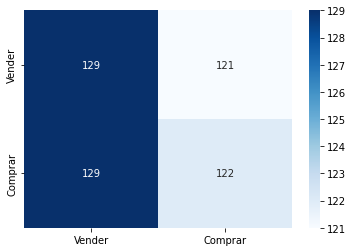

##################################################
AdaBoost
Reporte teste
              precision    recall  f1-score   support

           0       0.50      0.53      0.51       250
           1       0.50      0.46      0.48       251

    accuracy                           0.50       501
   macro avg       0.50      0.50      0.50       501
weighted avg       0.50      0.50      0.50       501



/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


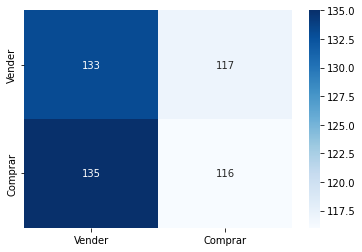

##################################################
DecisionTree
Reporte teste
              precision    recall  f1-score   support

           0       0.51      0.52      0.52       250
           1       0.51      0.49      0.50       251

    accuracy                           0.51       501
   macro avg       0.51      0.51      0.51       501
weighted avg       0.51      0.51      0.51       501



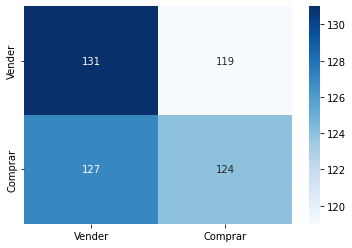

##################################################
RandomForest
Reporte teste
              precision    recall  f1-score   support

           0       0.54      0.53      0.54       250
           1       0.54      0.55      0.55       251

    accuracy                           0.54       501
   macro avg       0.54      0.54      0.54       501
weighted avg       0.54      0.54      0.54       501



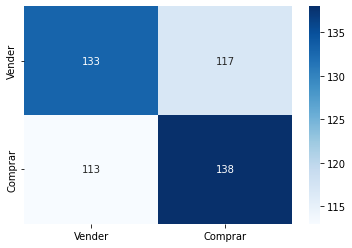

##################################################
ExtraTree
Reporte teste
              precision    recall  f1-score   support

           0       0.50      0.53      0.52       250
           1       0.51      0.48      0.49       251

    accuracy                           0.50       501
   macro avg       0.51      0.51      0.50       501
weighted avg       0.51      0.50      0.50       501



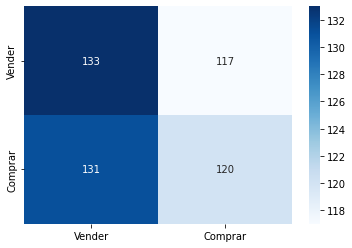

##################################################
GradientBoost
Reporte teste
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       250
           1       0.52      0.52      0.52       251

    accuracy                           0.51       501
   macro avg       0.51      0.51      0.51       501
weighted avg       0.51      0.51      0.51       501



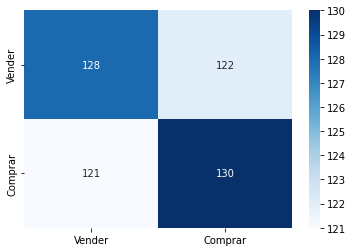

##################################################
KNN
Reporte teste
              precision    recall  f1-score   support

           0       0.49      0.47      0.48       250
           1       0.49      0.51      0.50       251

    accuracy                           0.49       501
   macro avg       0.49      0.49      0.49       501
weighted avg       0.49      0.49      0.49       501



/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


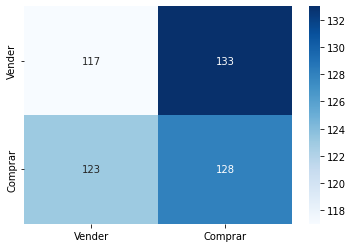

##################################################
LogisticRegression
Reporte teste
              precision    recall  f1-score   support

           0       0.52      0.63      0.57       250
           1       0.53      0.41      0.46       251

    accuracy                           0.52       501
   macro avg       0.52      0.52      0.52       501
weighted avg       0.52      0.52      0.52       501



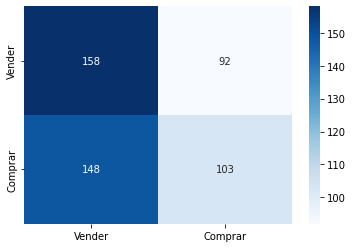

##################################################
RedeNeural
Reporte teste
              precision    recall  f1-score   support

           0       0.52      0.63      0.57       250
           1       0.53      0.41      0.47       251

    accuracy                           0.52       501
   macro avg       0.52      0.52      0.52       501
weighted avg       0.52      0.52      0.52       501



/Users/shopee/opt/anaconda3/envs/TCC_PUC/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


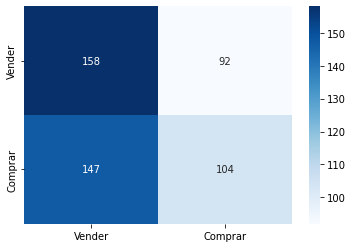

##################################################


In [13]:
def main():
    df = carregar_joblib()

    print("Feature Selection")
    # split database train and test
    X_treino, X_teste, y_treino, y_teste = split_dados(df)

    # Run a dummy predict classifier
    dummy_predict = run_dummy_classifier(X_treino, X_teste, y_treino)

    # print dummy results
    avaliar(y_teste, dummy_predict, "Dummy")

    modelos = definir_modelos_ml()

    modelos = rodar_imprimir_modelos_ml(modelos, X_treino, X_teste, y_treino, y_teste)

main()

## Escolha de 3 melhores modelos para comparação

In [12]:
def run_tunning_grid():
    modelo_final = modelos["RandomForest"]

    n_estimators = range(10, 251, 30)
    max_features = list()
    max_features.append('auto')

    precision2_score = make_scorer(precision_score, labels=[2], average='macro')

    grid = GridSearchCV(
            estimator=RandomForestClassifier(),
            param_grid={
                'n_estimators': n_estimators,
                'max_features': max_features,
                'random_state': [1],
            },
            scoring=precision2_score,
    )

    resultado_grid = grid.fit(X_treino, y_treino)   
    print("Ajuste feito")

NameError: name 'modelos' is not defined

RandomForest Tunado
Reporte teste
              precision    recall  f1-score   support

           0       0.53      0.63      0.57       250
           1       0.54      0.44      0.48       251

    accuracy                           0.53       501
   macro avg       0.53      0.53      0.53       501
weighted avg       0.53      0.53      0.53       501



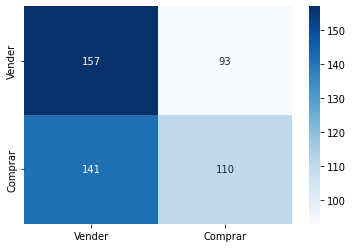

##################################################


In [ ]:
def test_tunning():
    modelo_tunado = resultado_grid.best_estimator_
    previsoes = modelo_tunado.predict(X_teste)
    avaliar(y_teste, previsoes, "RandomForest Tunado")